## EDA after ngrams for further analysis

In [65]:
import pandas as pd
import numpy as np

In [66]:
training = pd.read_csv("../data/processed/training.csv")

In [67]:
training.head(2)

,body,cleaned_body,label,tokens
0,Subject: off site with john griebling ' s opti...,subject off site with john griebling s optical...,0,"['subject', 'site', 'john', 'griebling', 'opti..."
1,Author: metze\nDate: 2007-04-27 14:23:08 +0000...,author metze new revision websvn log pass down...,0,"['author', 'metze', 'new', 'revision', 'websvn..."


In [68]:
import seaborn as sns

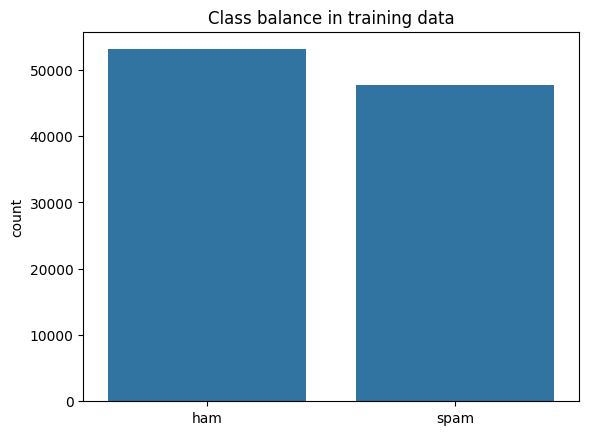

In [69]:
count = training['label'].value_counts()
labels = {0:'ham', 1:'spam'}

ax = sns.barplot(x = labels, y = count).set_title("Class balance in training data")

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
word_vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english', min_df = 5, max_df = 0.8, sublinear_tf=True)

X_text_full = training['cleaned_body']
X_word_grams_tfidf = word_vectorizer_tfidf.fit_transform(X_text_full)

In [72]:
spam = training[training['label'] == 1].copy()
ham = training[training['label'] == 0].copy()

In [73]:
# split for spam and ham
X_tfidf_spam = word_vectorizer_tfidf.transform(spam['cleaned_body'])
X_tfidf_ham = word_vectorizer_tfidf.transform(ham['cleaned_body'])

In [74]:
feature_names = word_vectorizer_tfidf.get_feature_names_out()
print(f"\nNumber of features (columns): {len(feature_names)}")
print(f"First 10 features: {feature_names[:10]}")


Number of features (columns): 1000
First 10 features: ['able' 'access' 'according' 'account' 'act' 'action' 'actually' 'add'
 'added' 'added submissionid']


In [75]:
spam_scores_sum = np.array(X_tfidf_spam.sum(axis=0)).flatten()
ham_scores_sum = np.array(X_tfidf_ham.sum(axis=0)).flatten()

combined_df_tfidf = pd.DataFrame({
    'word': feature_names,
    'spam tfifd score': spam_scores_sum,
    'ham tfifd score': ham_scores_sum
})

In [76]:
top_spam_words = combined_df_tfidf.sort_values(by='spam tfifd score', ascending=False)
print("--- Top 20 Words in Spam ---")
print(top_spam_words.head(20)) 

--- Top 20 Words in Spam ---
        word  spam tfifd score  ham tfifd score
638    price       1273.233049       281.768572
700  replica       1223.962115         4.545340
952  watches       1153.105280         7.889377
114    click       1140.153759       409.968325
523    money       1086.497290       123.256200
235    email       1064.993508      1594.553951
58      best       1062.870526       535.038763
570   online       1062.215404       248.184206
883     time       1023.908984      1068.787317
178      day       1023.841197       578.777592
434     life        989.643098       141.534831
296     free        963.053945       539.244261
182     dear        946.304051       302.821710
542      new        938.223050      1326.746498
668  quality        937.895980       106.709670
403     just        934.251526      1163.577856
563    offer        888.293811       205.345223
435     like        885.164150      1347.318458
951    watch        871.103020       195.321576
119      co

In [77]:
top_ham_words = combined_df_tfidf.sort_values(by='ham tfifd score', ascending=False)
print("--- Top 20 Words in Ham ---")
print(top_ham_words.head(20))

--- Top 20 Words in Ham ---
             word  spam tfifd score  ham tfifd score
990         wrote         43.937985      1976.935971
444          list        327.538279      1945.877480
235         email       1064.993508      1594.553951
468       mailing        161.206430      1512.333557
469  mailing list        111.316360      1503.469307
872        thanks        317.890005      1495.489282
242         enron          0.158610      1446.910187
831       subject        346.490368      1431.222357
919           use        600.782206      1381.850794
435          like        885.164150      1347.318458
542           new        938.223050      1326.746498
617            pm         58.866665      1292.175989
118          code         94.373624      1276.583305
501       message        512.337604      1271.059127
411          know        650.435349      1212.199780
914   unsubscribe        244.159347      1209.417747
403          just        934.251526      1163.577856
278          file 

In [78]:
# calculate tfidf score difference to compare
combined_df_tfidf['tfidf_difference'] = combined_df_tfidf['spam tfifd score'] - combined_df_tfidf['ham tfifd score']

In [79]:
comparing_spam = combined_df_tfidf.sort_values(by='tfidf_difference', ascending=False)
print("--- Top 20 largest difference: Spam_tfidf- Ham_tfidf ---")
print(comparing_spam.head(20))

# from this list we see words that appear in spam much more than ham

--- Top 20 largest difference: Spam_tfidf- Ham_tfidf ---
            word  spam tfifd score  ham tfifd score  tfidf_difference
700      replica       1223.962115         4.545340       1219.416775
952      watches       1153.105280         7.889377       1145.215903
638        price       1273.233049       281.768572        991.464477
523        money       1086.497290       123.256200        963.241090
434         life        989.643098       141.534831        848.108267
668      quality        937.895980       106.709670        831.186310
570       online       1062.215404       248.184206        814.031198
114        click       1140.153759       409.968325        730.185434
333       health        860.368546       160.609583        699.758964
563        offer        888.293811       205.345223        682.948588
951        watch        871.103020       195.321576        675.781444
182         dear        946.304051       302.821710        643.482341
743         save        803.14571

In [80]:
comparing_ham = combined_df_tfidf.sort_values(by='tfidf_difference', ascending=True) # flip order
print("--- Top 20 largest difference: Ham_tfidf- Spam_tfidf ---")
print(comparing_ham.head(20))

# from this list we see words that appear in ham much more than in spam

--- Top 20 largest difference: Ham_tfidf- Spam_tfidf ---
             word  spam tfifd score  ham tfifd score  tfidf_difference
990         wrote         43.937985      1976.935971      -1932.997987
444          list        327.538279      1945.877480      -1618.339201
242         enron          0.158610      1446.910187      -1446.751577
469  mailing list        111.316360      1503.469307      -1392.152947
468       mailing        161.206430      1512.333557      -1351.127126
617            pm         58.866665      1292.175989      -1233.309325
118          code         94.373624      1276.583305      -1182.209681
872        thanks        317.890005      1495.489282      -1177.599277
831       subject        346.490368      1431.222357      -1084.731989
914   unsubscribe        244.159347      1209.417747       -965.258400
278          file        169.442572      1076.852069       -907.409497
937         vince          2.712038       904.118627       -901.406589
227           ect   

Visualising differences

In [81]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

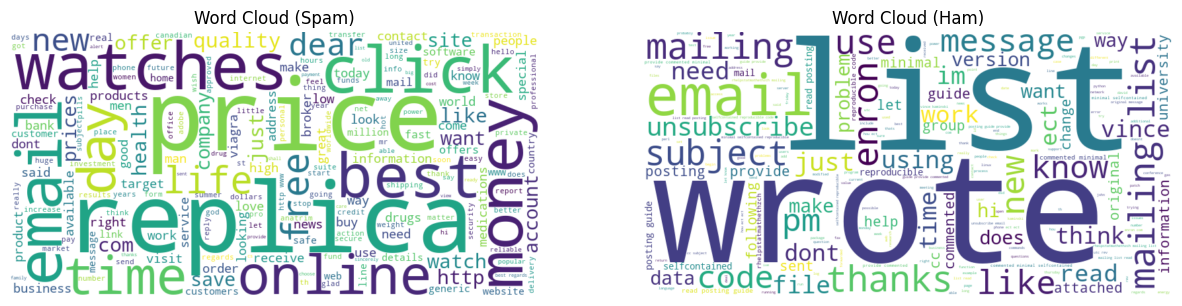

In [82]:
spam_dict = dict(zip(combined_df_tfidf['word'], combined_df_tfidf['spam tfifd score']))
ham_dict = dict(zip(combined_df_tfidf['word'], combined_df_tfidf['ham tfifd score']))

wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_dict)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_dict)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Spam)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Ham)")
plt.show()

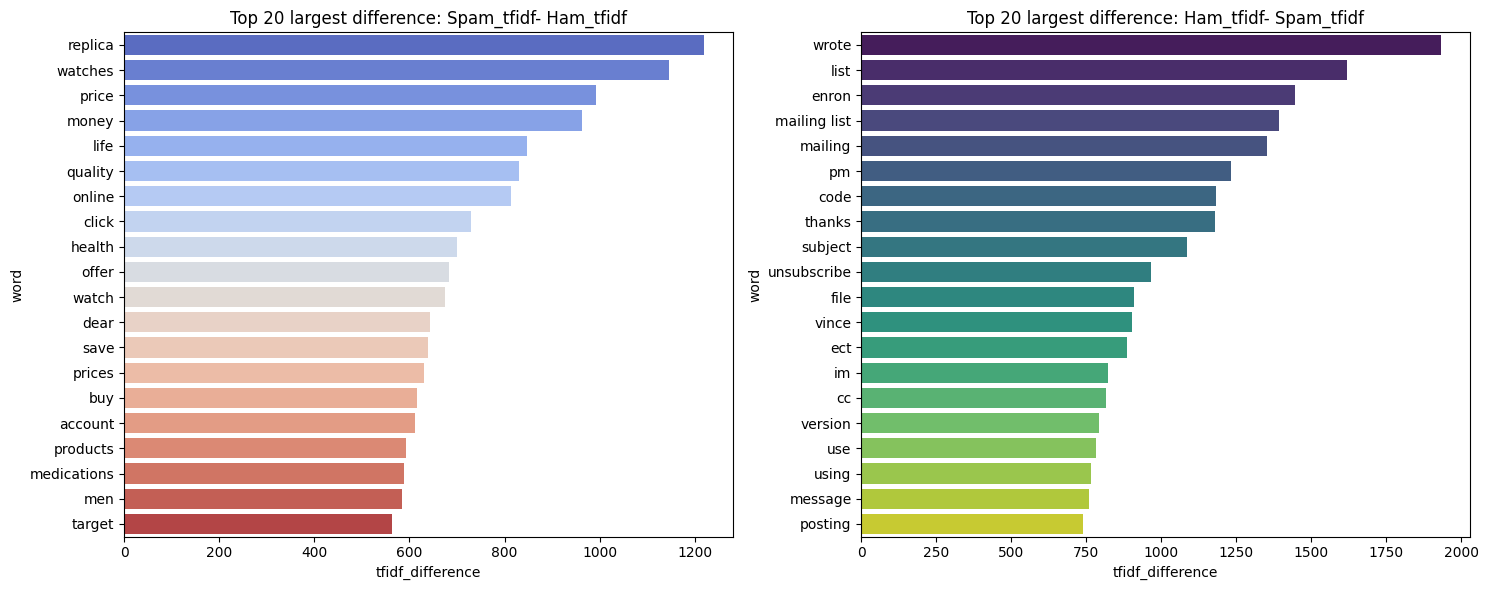

In [84]:
top_spam = combined_df_tfidf.sort_values('tfidf_difference', ascending=False).head(20)

top_ham = combined_df_tfidf.sort_values('tfidf_difference', ascending=True).head(20).copy()
top_ham['tfidf_difference'] = top_ham['tfidf_difference'].abs() # to get positive values for ham

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='tfidf_difference', y='word', data=top_spam, palette="coolwarm", hue='word', legend=False)
plt.title("Top 20 largest difference: Spam_tfidf- Ham_tfidf")

plt.subplot(1, 2, 2)
sns.barplot(x='tfidf_difference', y='word', data=top_ham, palette="viridis", hue='word', legend=False)
plt.title("Top 20 largest difference: Ham_tfidf- Spam_tfidf")
plt.tight_layout()
plt.show()

Will need to do further data cleaning to remove words - e.g. enron, subject, cc - for more accurate analysis.

Possible hypotheses derived:
- Spam content have more financial terms -- price, money, offer
- Spam content have external links -- click